## Guideline

**Devising a marketing strategy**
-  You are at a marketing team and you want to do a **target marketing**
-  Using raw data given, you are to process data and using analysis that we have done during the class, try to come up with target marketing.
-  For each target group, you can write a short paragraph describing their consuming behavior, and how you would conduct target marketing for each group.
-  Within data, there are a lot of info available so whichever data you choose, it is up to you.

-  Upload the following files:
    - 1) jupyternotebook file 
    - 2) a word file with figures and written descriptions. (up to 4 pages including everything would be fine)

## Assignment

### Data Preprocessing

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_excel('Updated_Marketing_Campaign_Data.xlsx')
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Encoded,Marital_Status_Encoded,Customer_Segment,Churn_Probability,Preferred_Channel,Campaign_Effectiveness,Promotion_Sensitivity,Avg_Spending_per_Purchase,Family_Size,Engagement_Score
0,Bachelor,Single,0.235696,0,0,58,635,88,546,172,...,1,0,High-Value,0.374540,Catalog,Unengaged,Moderately Sensitive,0.076337,Single/No Kids,0.022432
1,Bachelor,Single,-0.235454,1,1,38,11,1,6,2,...,1,0,Low-Value,0.950714,Store,Unengaged,Not Sensitive,-0.240319,Family,0.153968
2,Bachelor,Together,0.773999,0,0,26,426,49,127,111,...,1,1,Moderate-Value,0.731994,Store,Unengaged,Not Sensitive,0.014134,Single/No Kids,-0.087245
3,Bachelor,Together,-1.022355,1,0,26,11,4,20,10,...,1,1,Low-Value,0.598658,Store,Unengaged,Not Sensitive,-0.153016,Couple/No Kids,0.297142
4,PhD,Married,0.241888,1,0,94,173,43,118,46,...,3,2,Moderate-Value,0.156019,Store,Unengaged,Highly Sensitive,-0.021804,Couple/No Kids,-0.037614


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  2240 non-null   object 
 1   Marital_Status             2240 non-null   object 
 2   Income                     2240 non-null   float64
 3   Kidhome                    2240 non-null   int64  
 4   Teenhome                   2240 non-null   int64  
 5   Recency                    2240 non-null   int64  
 6   MntWines                   2240 non-null   int64  
 7   MntFruits                  2240 non-null   int64  
 8   MntMeatProducts            2240 non-null   int64  
 9   MntFishProducts            2240 non-null   int64  
 10  MntSweetProducts           2240 non-null   int64  
 11  MntGoldProds               2240 non-null   int64  
 12  NumDealsPurchases          2240 non-null   int64  
 13  NumWebPurchases            2240 non-null   int64

In [56]:
df.isna().sum()

Education                    0
Marital_Status               0
Income                       0
Kidhome                      0
Teenhome                     0
Recency                      0
MntWines                     0
MntFruits                    0
MntMeatProducts              0
MntFishProducts              0
MntSweetProducts             0
MntGoldProds                 0
NumDealsPurchases            0
NumWebPurchases              0
NumCatalogPurchases          0
NumStorePurchases            0
NumWebVisitsMonth            0
AcceptedCmp3                 0
AcceptedCmp4                 0
AcceptedCmp5                 0
AcceptedCmp1                 0
AcceptedCmp2                 0
Complain                     0
Response                     0
Age                          0
Total_Spending               0
Customer_Tenure_Days         0
Social_Media_Engagement      0
Newsletter_Clicks            0
Brand_Loyalty_Score          0
Education_Encoded            0
Marital_Status_Encoded       0
Customer

In [57]:
# Missing Values
weight = df['Total_Spending'].mean()/df['Avg_Spending_per_Purchase'].mean() 

df['Avg_Spending_per_Purchase'] = df.apply(lambda df: weight * df['Total_Spending'] 
                                           if pd.isna(df['Avg_Spending_per_Purchase']) else df['Avg_Spending_per_Purchase'], axis=1)

In [58]:
# Categorical Values
for col in df.select_dtypes(include='object'):
    print(col, df[col].unique())

Education ['Bachelor' 'PhD' 'Master' 'Basic' 'High school']
Marital_Status ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Customer_Segment ['High-Value' 'Low-Value' 'Moderate-Value']
Preferred_Channel ['Catalog' 'Store' 'Web']
Campaign_Effectiveness ['Unengaged' 'Engaged']
Promotion_Sensitivity ['Moderately Sensitive' 'Not Sensitive' 'Highly Sensitive']
Family_Size ['Single/No Kids' 'Family' 'Couple/No Kids']


In [59]:
print('Education:\n',df.groupby(by='Education_Encoded')['Education'].value_counts())
print('\nMarital Status:\n',df.groupby(by='Marital_Status_Encoded')['Marital_Status'].value_counts())

Education:
 Education_Encoded  Education  
-1                 High school     203
 0                 Basic            54
 1                 Bachelor       1127
 2                 Master          370
 3                 PhD             486
Name: count, dtype: int64

Marital Status:
 Marital_Status_Encoded  Marital_Status
-1                      Alone               3
                        Absurd              2
                        YOLO                2
 0                      Single            480
 1                      Together          580
 2                      Married           864
 3                      Divorced          232
 4                      Widow              77
Name: count, dtype: int64


In [60]:
# Pre-processing (Categorical Values)
df = df.drop(['Education','Marital_Status'], axis=1)

df['Family_Size'] = df['Family_Size'].apply(lambda x: 1 if x=='Single/No Kids' else(2 if x=='Couple/No Kids' else 3))
df['Customer_Segment'] = df['Customer_Segment'].apply(lambda x: 1 if x=='Low-Value' else(2 if x=='Moderate-Value' else 3))
df['Preferred_Channel'] = df['Preferred_Channel'].apply(lambda x: 1 if x=='Catalog' else(2 if x=='Store' else 3))
df['Campaign_Effectiveness'] = df['Campaign_Effectiveness'].apply(lambda x: 1 if x=='Engaged' else 0)
df['Promotion_Sensitivity'] = df['Promotion_Sensitivity'].apply(lambda x: -1 if x=='Not Sensitive' else(1 if x=='Highly Sensitive' else 0))

# Pre-processing (Drop Unrelated Columns)
df = df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Customer_Segment'],axis=1)

### EDA

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Income                     2240 non-null   float64
 1   Kidhome                    2240 non-null   int64  
 2   Teenhome                   2240 non-null   int64  
 3   Recency                    2240 non-null   int64  
 4   MntWines                   2240 non-null   int64  
 5   MntFruits                  2240 non-null   int64  
 6   MntMeatProducts            2240 non-null   int64  
 7   MntFishProducts            2240 non-null   int64  
 8   MntSweetProducts           2240 non-null   int64  
 9   MntGoldProds               2240 non-null   int64  
 10  NumDealsPurchases          2240 non-null   int64  
 11  NumWebPurchases            2240 non-null   int64  
 12  NumCatalogPurchases        2240 non-null   int64  
 13  NumStorePurchases          2240 non-null   int64

In [62]:
# Data Distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2240.0,-4.916702e-17,1.000223,-2.017707,-0.667105,-0.034215,0.641241,24.545343
Kidhome,2240.0,4.441964e-01,0.538398,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2240.0,5.062500e-01,0.544538,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2240.0,4.910938e+01,28.962453,0.000000,24.000000,49.000000,74.000000,99.000000
MntWines,2240.0,3.039357e+02,336.597393,0.000000,23.750000,173.500000,504.250000,1493.000000
MntFruits,2240.0,2.630223e+01,39.773434,0.000000,1.000000,8.000000,33.000000,199.000000
MntMeatProducts,2240.0,1.669500e+02,225.715373,0.000000,16.000000,67.000000,232.000000,1725.000000
MntFishProducts,2240.0,3.752545e+01,54.628979,0.000000,3.000000,12.000000,50.000000,259.000000
MntSweetProducts,2240.0,2.706295e+01,41.280498,0.000000,1.000000,8.000000,33.000000,263.000000
MntGoldProds,2240.0,4.402188e+01,52.167439,0.000000,9.000000,24.000000,56.000000,362.000000


In [63]:
def draw_plot(cols):
    num_cols = 2  
    num_rows = (len(cols) + num_cols - 1) // num_cols  
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 2))
    axes = axes.flatten()  
    
    for i, col in enumerate(cols):
        axes[i].hist(df[col], edgecolor='k')
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
    
    plt.tight_layout()  
    plt.show()

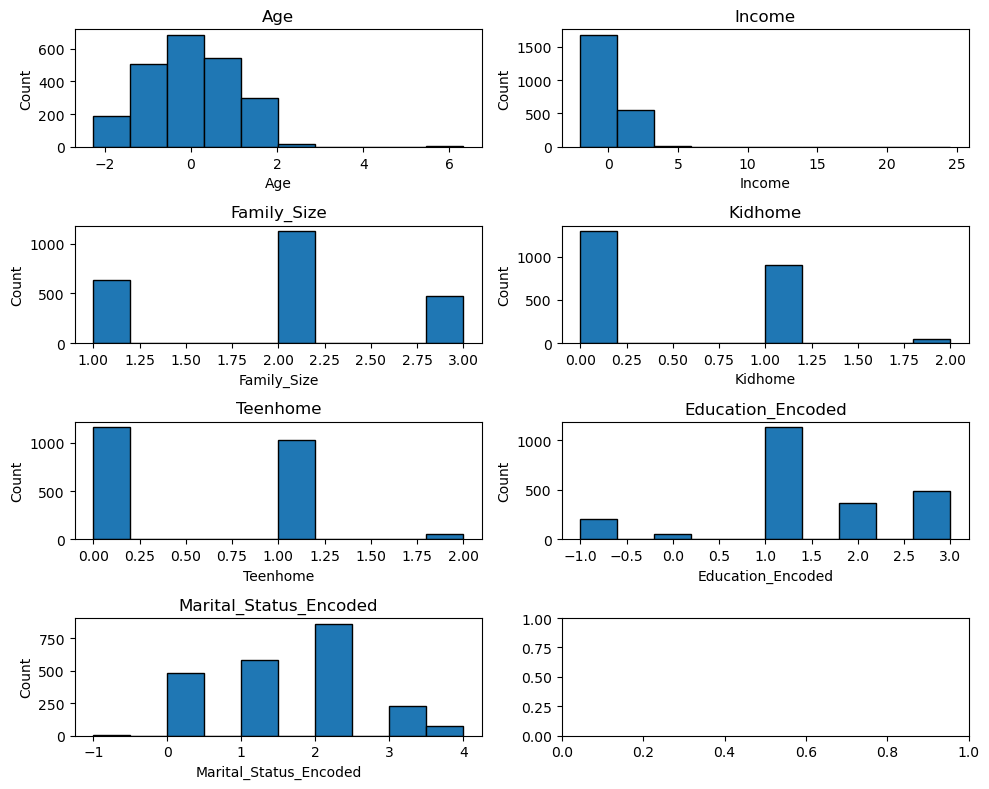

In [116]:
# Demographic Information
demographic = ['Age','Income','Family_Size', 'Kidhome', 'Teenhome', 'Education_Encoded', 'Marital_Status_Encoded']
draw_plot(demographic)

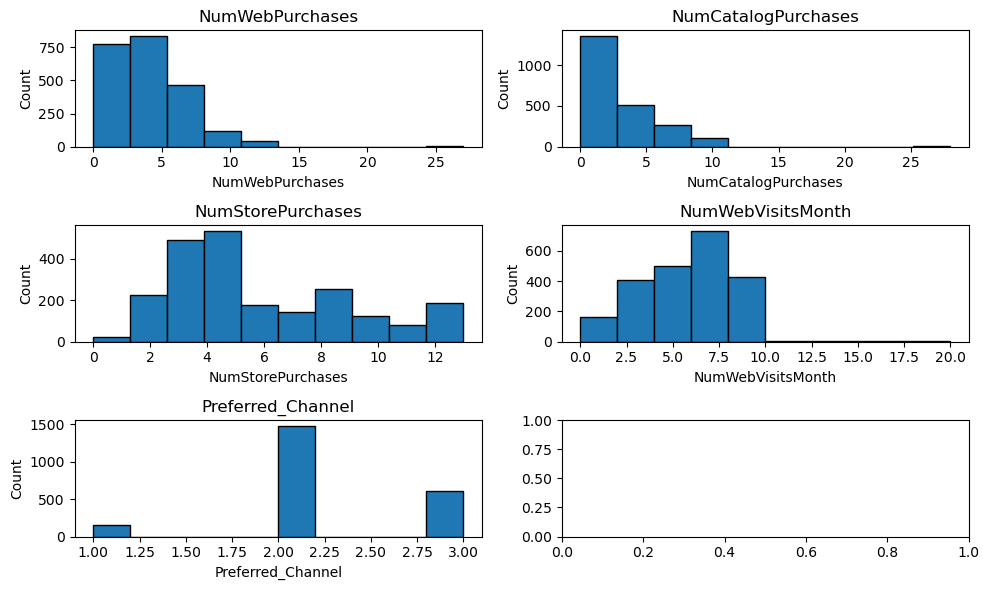

In [65]:
# Place Information
place = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Preferred_Channel']
draw_plot(place)

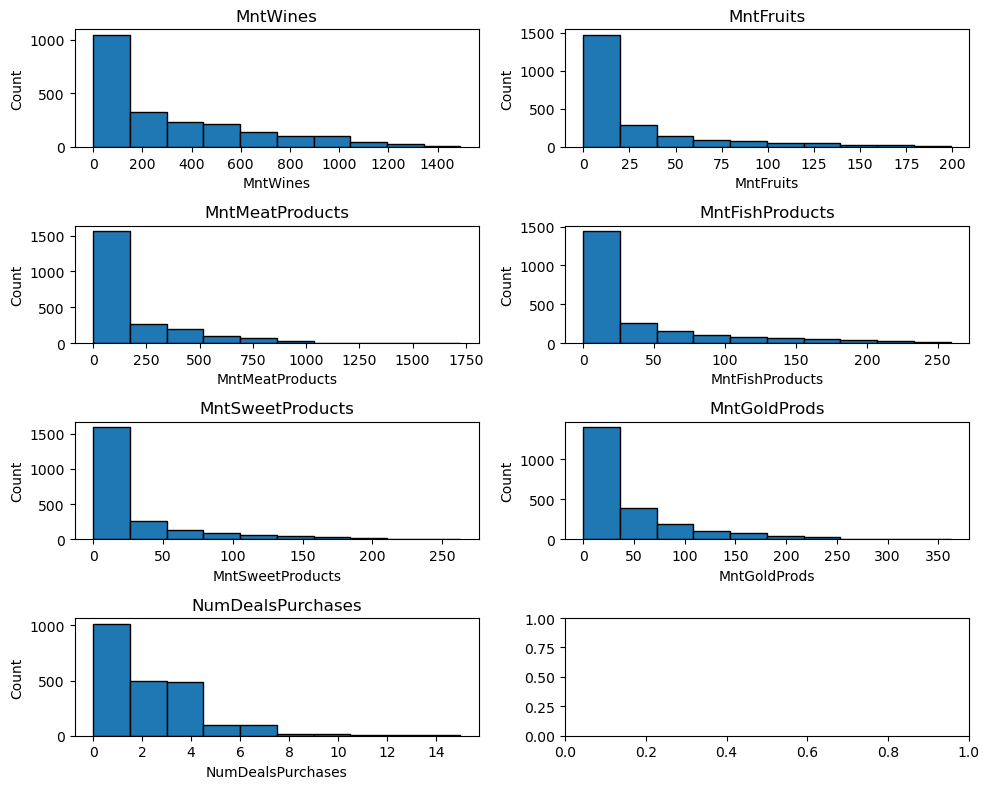

In [66]:
# Product Information
product = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases']
draw_plot(product)

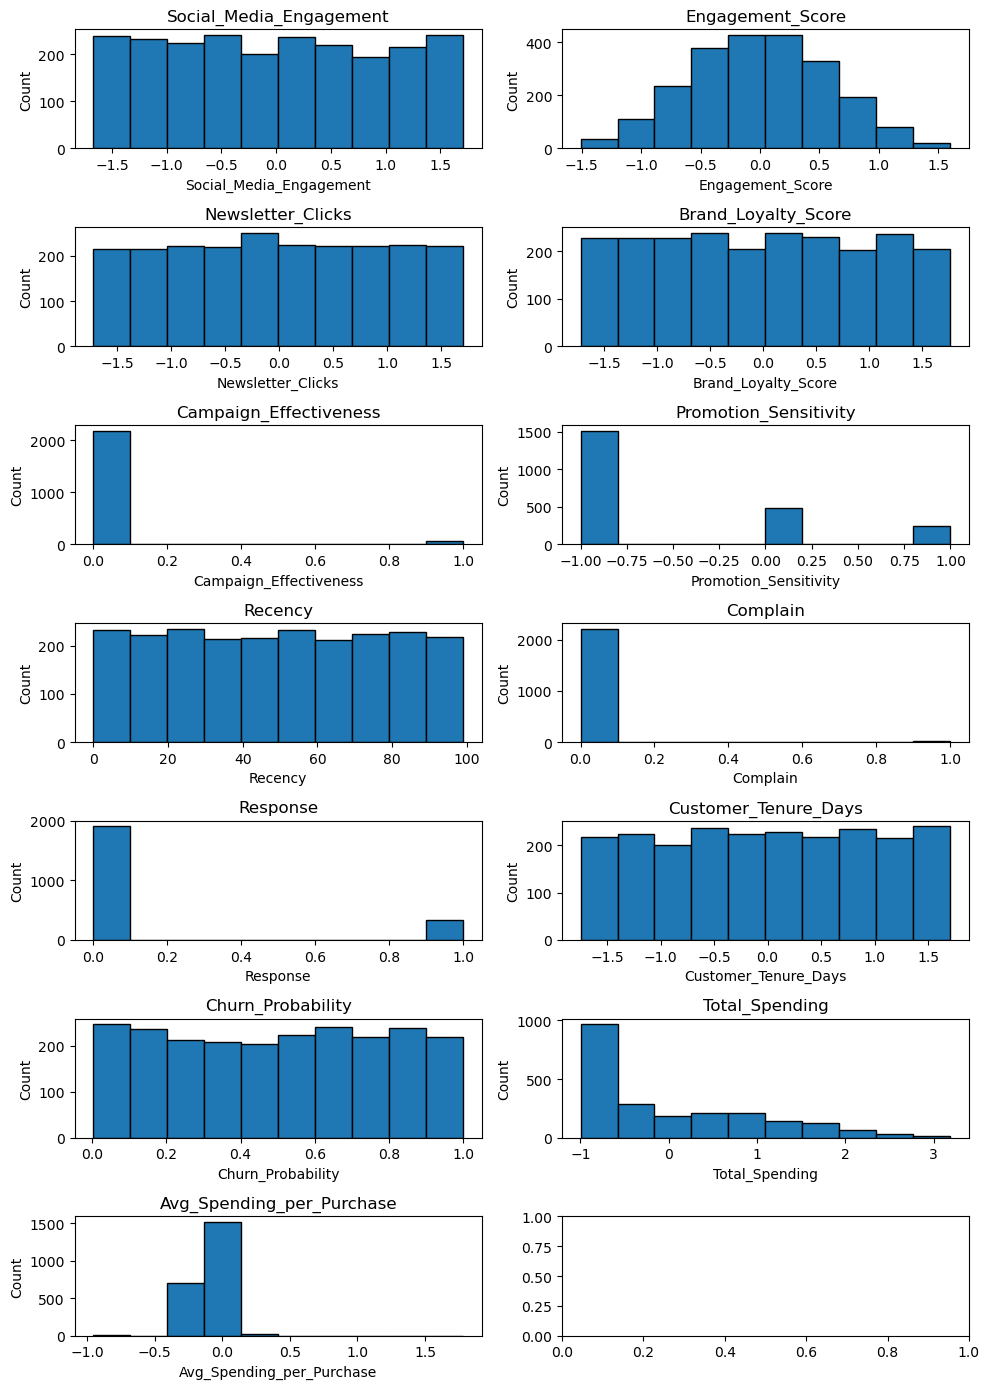

In [67]:
# Behavior Information
behavior = ['Social_Media_Engagement','Engagement_Score', 'Newsletter_Clicks', 'Brand_Loyalty_Score', 'Campaign_Effectiveness', 
            'Promotion_Sensitivity','Recency', 'Complain', 'Response', 'Customer_Tenure_Days', 'Churn_Probability', 
            'Total_Spending', 'Avg_Spending_per_Purchase']
draw_plot(behavior)

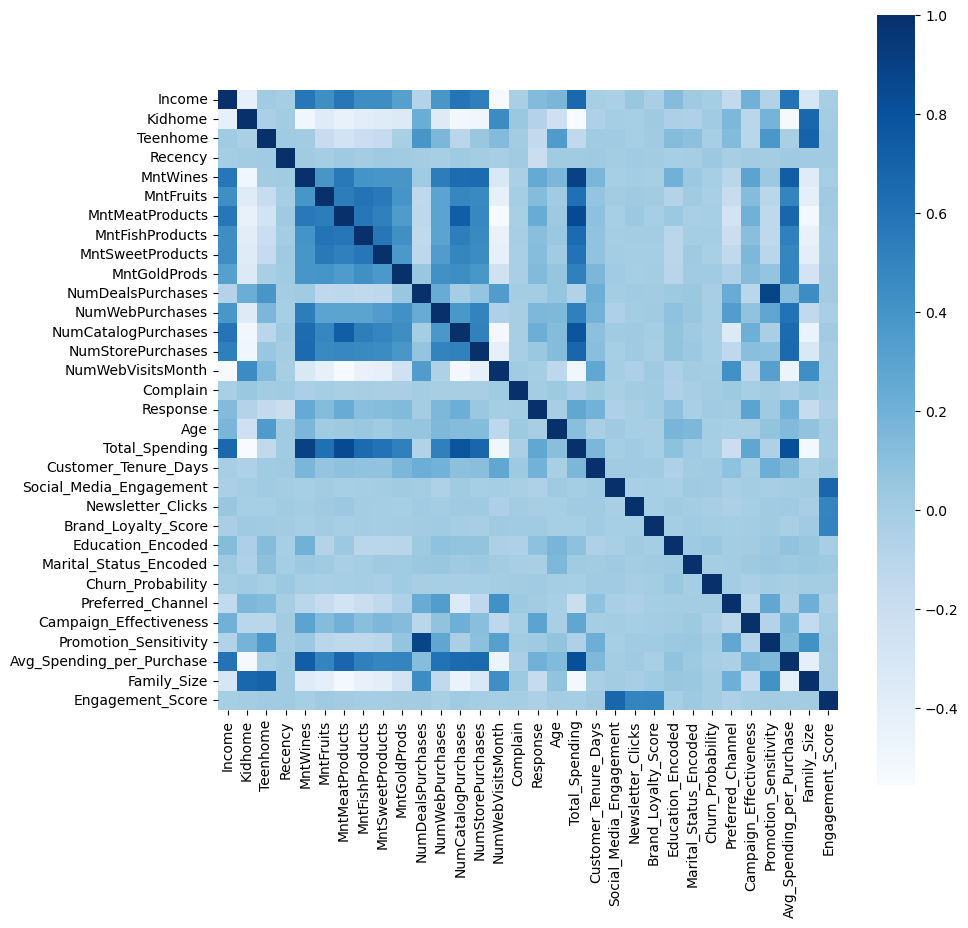

In [68]:
# Correlation between columns
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, cmap='Blues')
plt.show()

In [69]:
corr['Total_Spending'].sort_values(ascending=False)

Total_Spending               1.000000
MntWines                     0.891839
MntMeatProducts              0.842965
Avg_Spending_per_Purchase    0.813404
NumCatalogPurchases          0.778577
NumStorePurchases            0.674669
Income                       0.664775
MntFishProducts              0.642818
MntFruits                    0.614229
MntSweetProducts             0.603016
MntGoldProds                 0.524262
NumWebPurchases              0.519837
Campaign_Effectiveness       0.279054
Response                     0.265298
Customer_Tenure_Days         0.158814
Age                          0.111306
Education_Encoded            0.092054
Recency                      0.020433
Marital_Status_Encoded       0.014186
Newsletter_Clicks            0.013231
Engagement_Score            -0.006362
Social_Media_Engagement     -0.008243
Churn_Probability           -0.012509
Brand_Loyalty_Score         -0.014399
Complain                    -0.037058
Promotion_Sensitivity       -0.049954
NumDealsPurc

### Modeling

In [71]:
prod_df = df[product]

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
prod_transormed = pca.fit_transform(prod_df)

df['PCA_X (Product)'] = prod_transormed[:,0]
df['PCA_Y (Product)'] = prod_transormed[:,1]

In [73]:
pca_df = pd.DataFrame(data=pca.components_.T, index=prod_df.columns, columns=['PCA_X','PCA_Y'])
pca_df

,PCA_X,PCA_Y
MntWines,0.882998,-0.466892
MntFruits,0.051789,0.072181
MntMeatProducts,0.453655,0.871588
MntFishProducts,0.073731,0.107718
MntSweetProducts,0.052859,0.070190
MntGoldProds,0.059999,0.024564
NumDealsPurchases,-0.000144,-0.001768


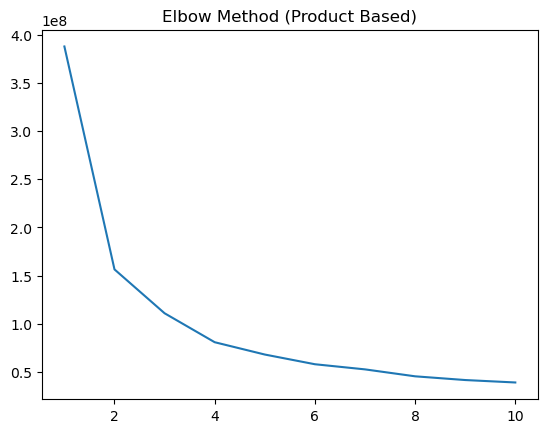

In [74]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=1)
    km.fit(prod_df)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method (Product Based)')
plt.show()

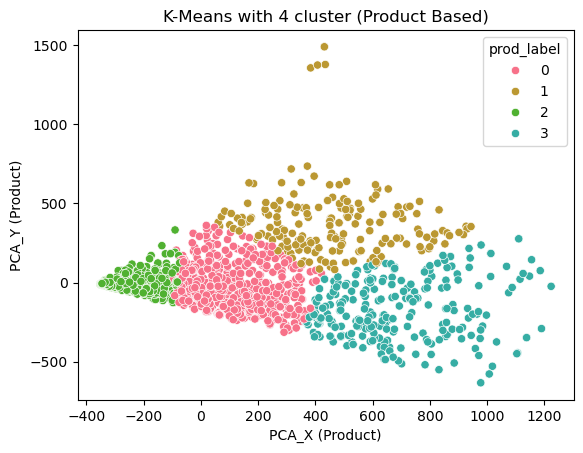

In [75]:
km3 = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=1)
df['prod_label'] = km3.fit_predict(prod_df)

sns.scatterplot(x=df['PCA_X (Product)'], y=df['PCA_Y (Product)'], hue=df['prod_label'], palette=sns.color_palette('husl'))
plt.title('K-Means with 4 cluster (Product Based)')
plt.show()

### Interpretation

In [77]:
def draw_boxplot(cols, hue_col):
    num_cols = 2
    num_rows = (len(cols) + num_cols - 1) // num_cols
    x_col = hue_col

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 4))
    axes = axes.flatten()  

    for i, col in enumerate(cols):
        sns.boxplot(data=df, x=x_col, y=col, hue=hue_col, palette=sns.color_palette('husl'), ax=axes[i])
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel(x_col)
        axes[i].set_ylabel(col)

    plt.tight_layout()  
    plt.show()

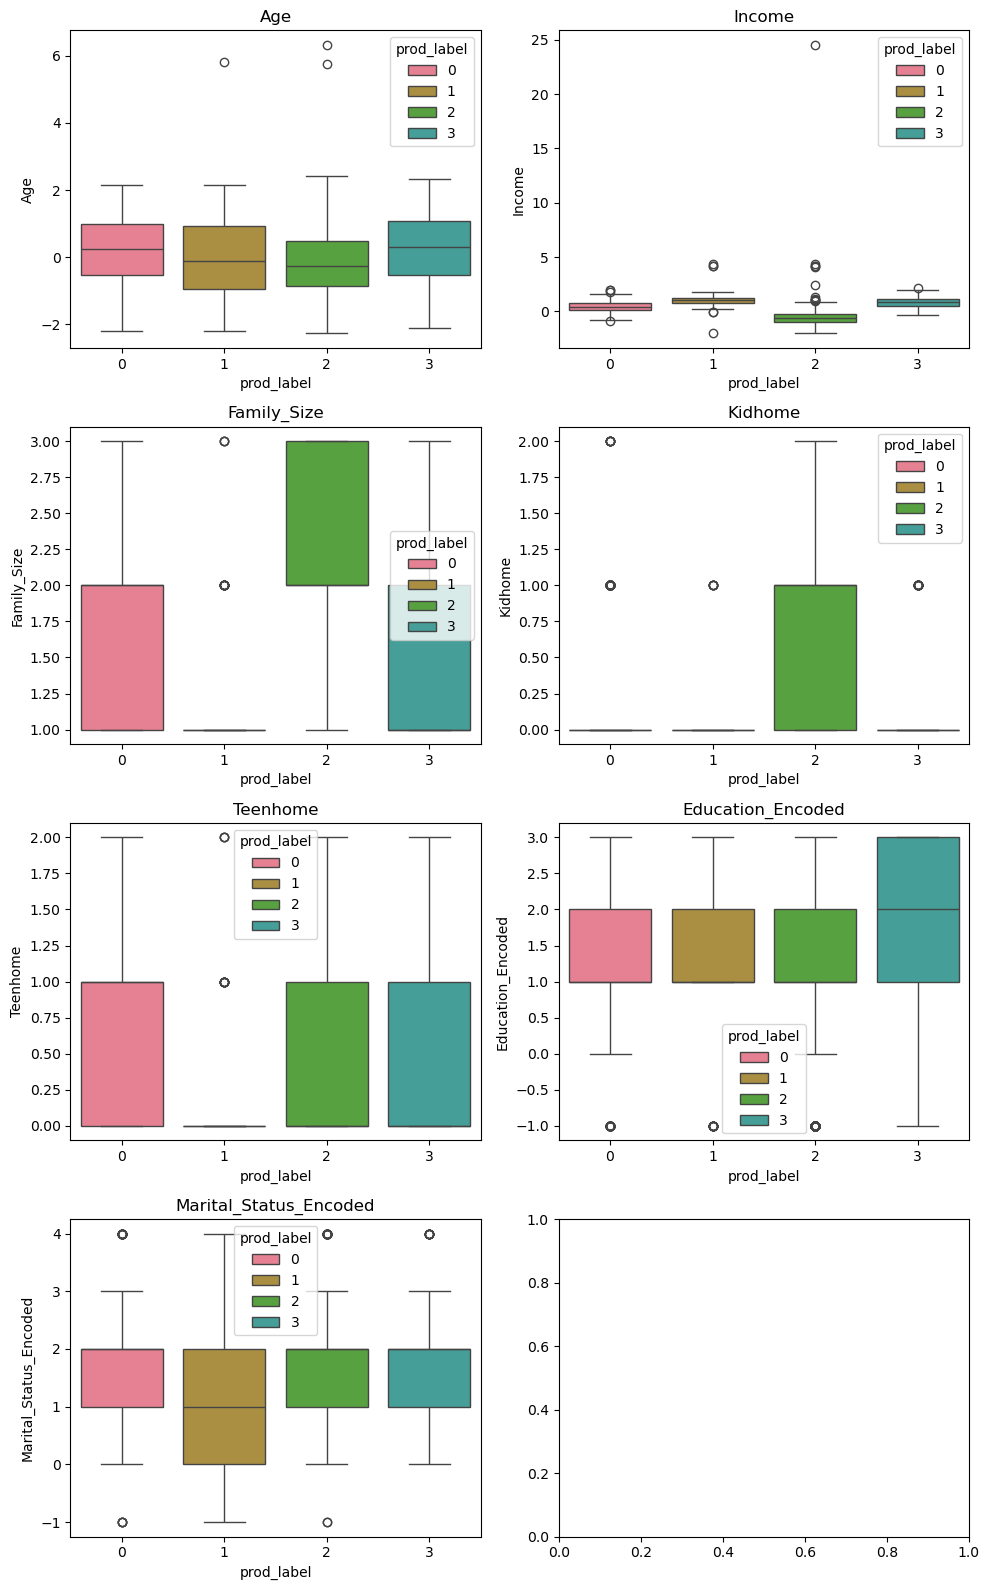

In [120]:
# Demographic
draw_boxplot(demographic,'prod_label')

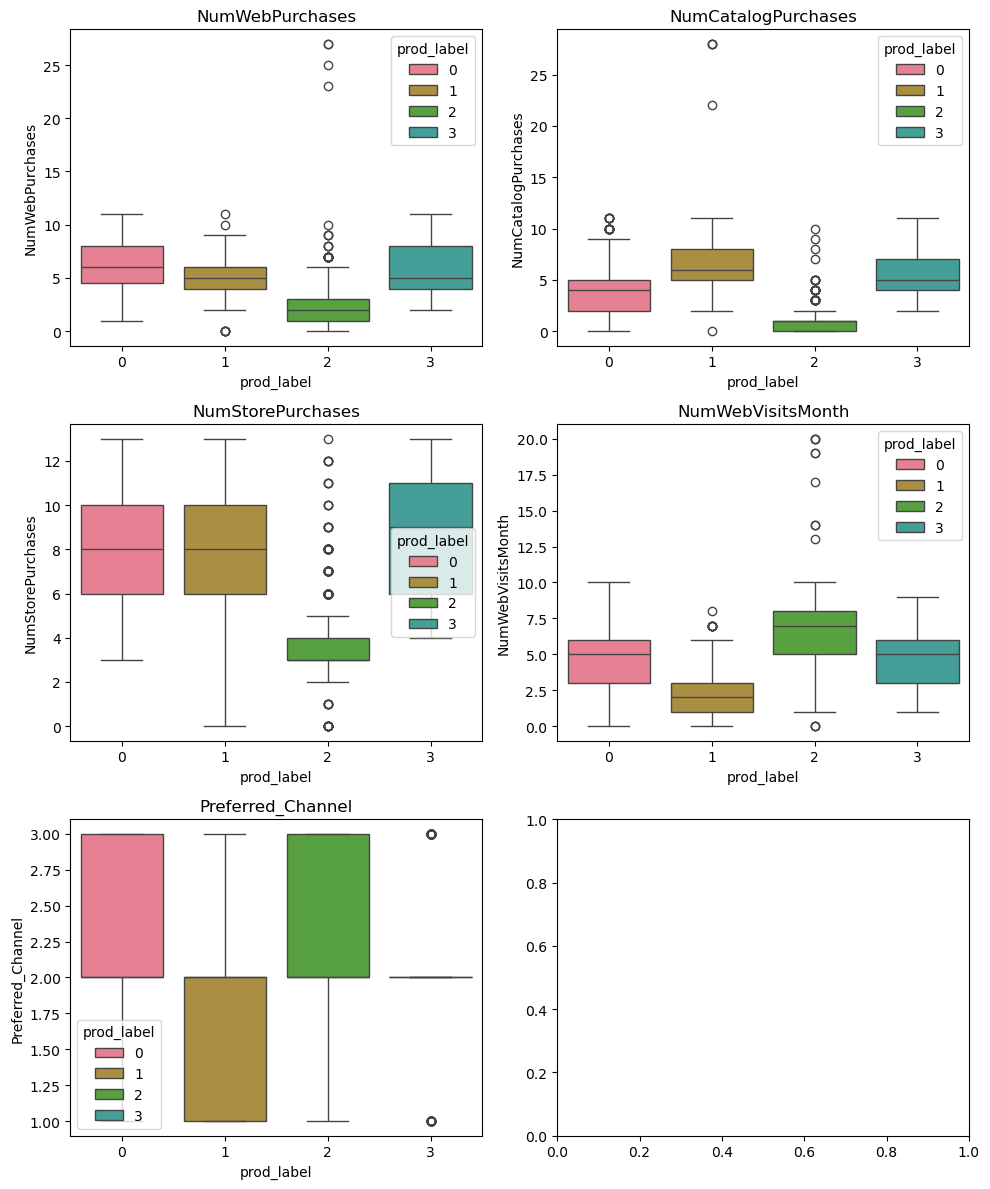

In [79]:
# Place
draw_boxplot(place,'prod_label')

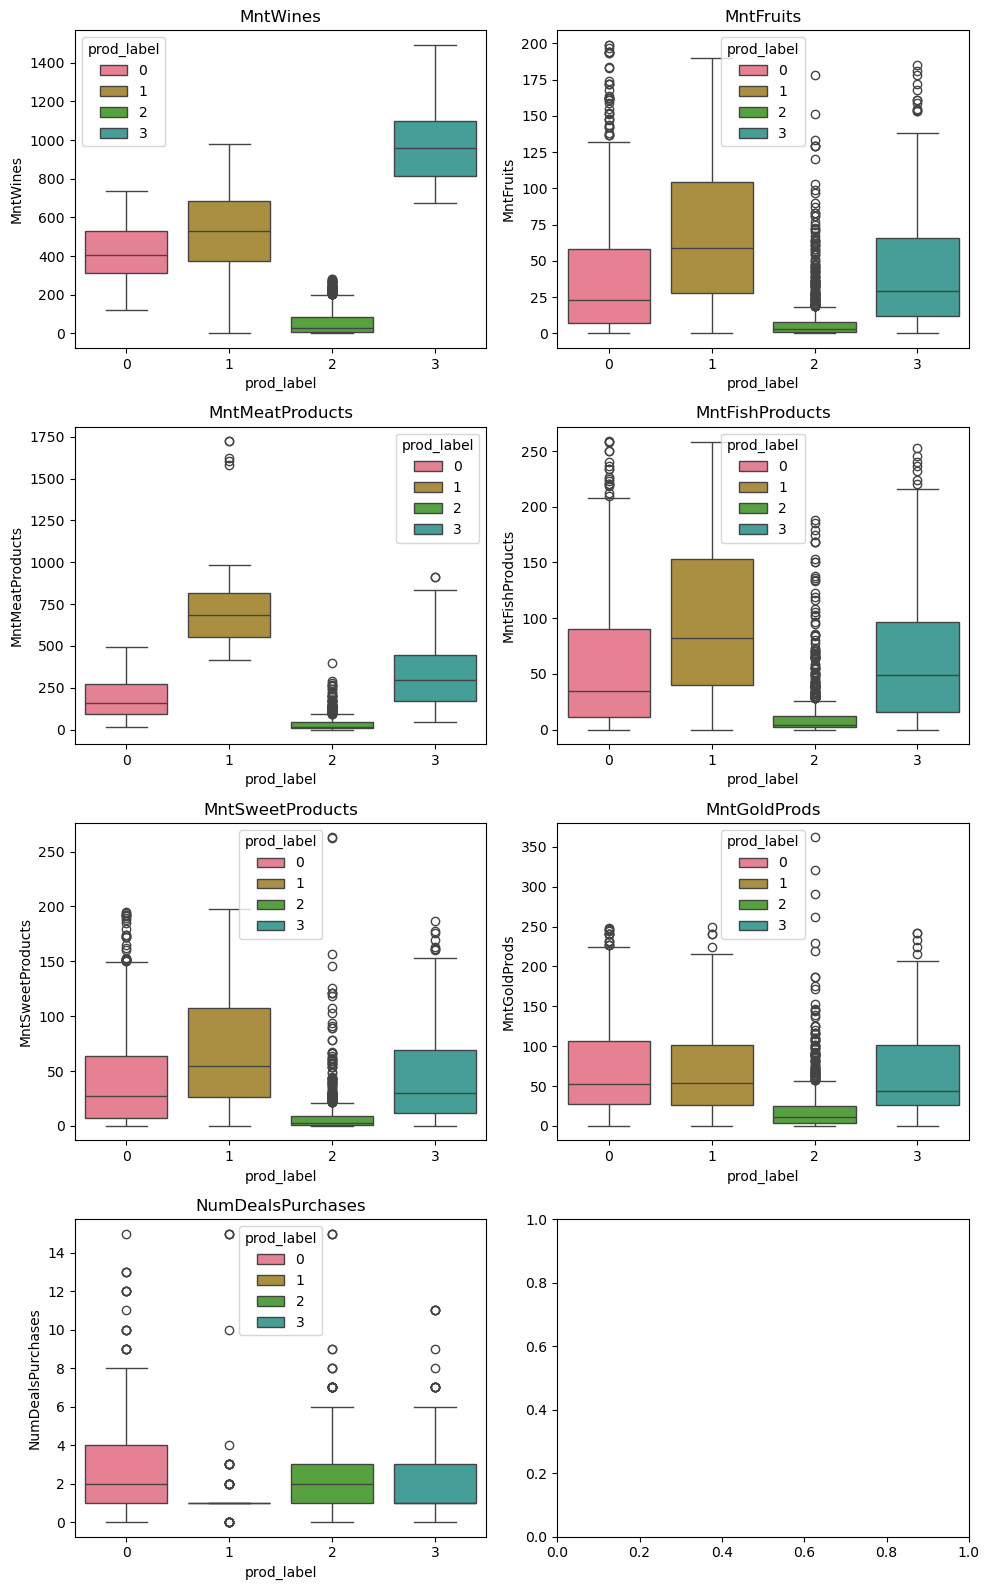

In [80]:
# Product
draw_boxplot(product,'prod_label')

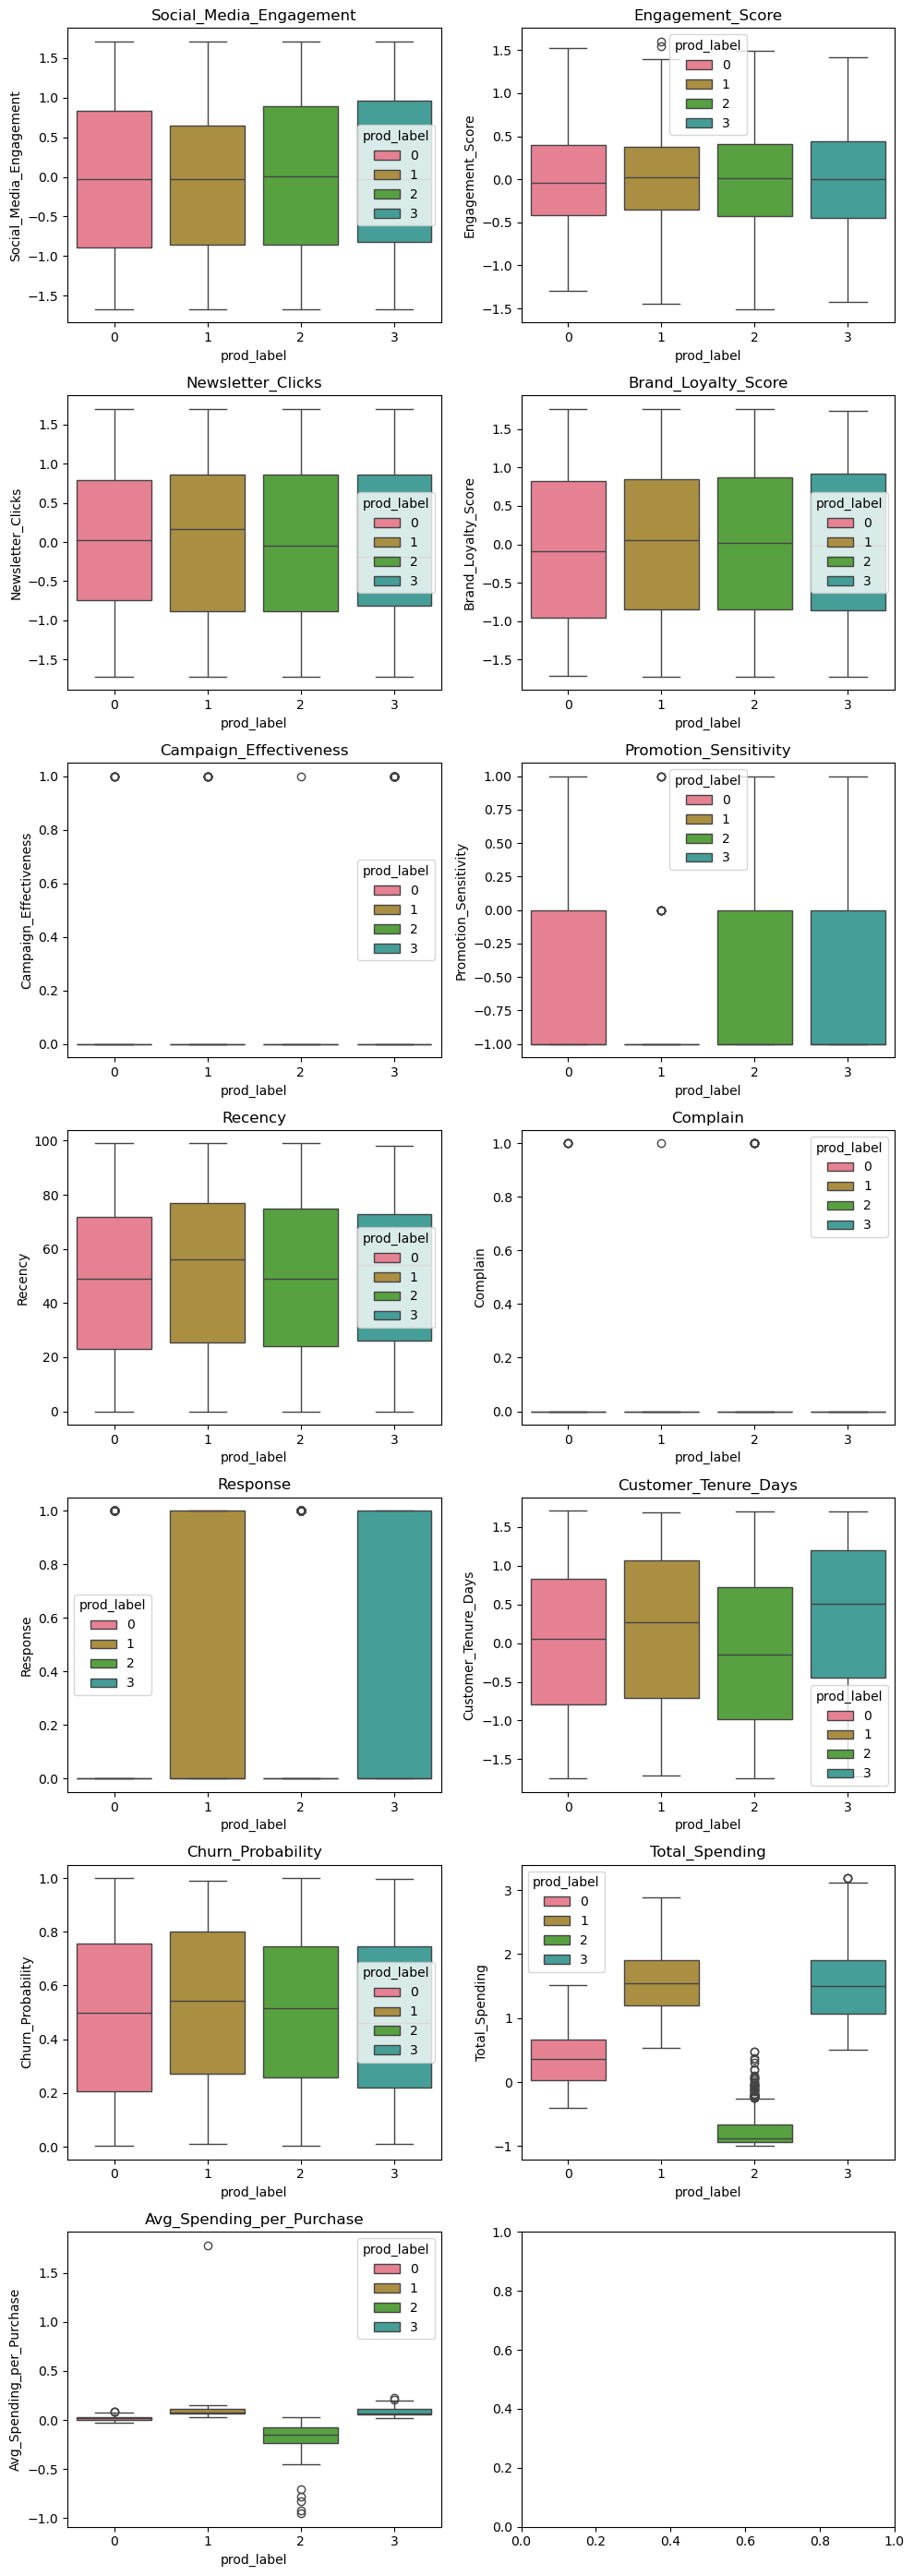

In [81]:
# Behavior
draw_boxplot(behavior,'prod_label')